#First Things First -> Mount Drive, Import Libraries, Auto-reload setup

In [41]:
##Run this cell once and then comment it out.
# !pip install -q transformers datasets huggingface_hub evaluate sentencepiece scikit-learn imbalanced-learn accelerate torch pandas matplotlib

In [42]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"
os.environ["WANDB_SILENT"] = "true"

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import os

GOOGLE_DRIVE_PATH = os.path.join('/content', 'drive', 'My Drive', 'ColabNotebooks', 'DL','Deep Learning Project Full','DL Team Project', '20251126_22.47_DL_Team_Project_Code_Files_Structure')
print(os.listdir(GOOGLE_DRIVE_PATH))

['20251201_11.03_ME_DL_Project_ColabNotebook_BERT.ipynb', '20251126_22.47_KP_DL_Project_ColabNotebook.ipynb', 'src', 'configs', 'outputs', 'data', '20251130_10.42_ME_DL_Project_ColabNotebook_BERT_old.ipynb']


In [45]:
import sys

sys.path.append(GOOGLE_DRIVE_PATH)

In [46]:
# if running locally set GOOGLE PATH
import sys
if 'google.colab' in sys.modules:
  print(f'Running in google colab. Our path is `{GOOGLE_DRIVE_PATH}`')
else:
  GOOGLE_DRIVE_PATH = '.'
  print('Running locally.')

Running in google colab. Our path is `/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/20251126_22.47_DL_Team_Project_Code_Files_Structure`


In [47]:
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/20251126_22.47_DL_Team_Project_Code_Files_Structure


In [48]:
# ch dir to project folder
os.chdir(GOOGLE_DRIVE_PATH)

In [49]:
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/20251126_22.47_DL_Team_Project_Code_Files_Structure


In [50]:
# Note: Set version to 2025.07 for autoreload
# import imp

In [51]:
# Note: Uncomment for autoreload
# %load_ext autoreload
# # %reload_ext autoreload
# %autoreload 2

In [52]:
##Run this cell once and then comment it out.
# !pip install -q --upgrade transformers datasets huggingface_hub

In [53]:
# optional: check torch & CUDA
import torch
print("torch:", torch.__version__, "cuda_available:", torch.cuda.is_available())

torch: 2.9.0+cu126 cuda_available: True


#**START HERE**
If not already done, complete running the First Things First Section before Starting Here

##Load Pre-Processed Data

Note: In Label3 class: 2 means positive rating, 1 means neutral and 0 means negative. (Useful for sentiment analysis).

In [54]:
#Just for Information: Number of rows in pre-processed data = 578,425
import pandas as pd
#Import pre-processed data
csv_path_train_data = f"{GOOGLE_DRIVE_PATH}/data/data_train.csv"
csv_path_val_data = f"{GOOGLE_DRIVE_PATH}/data/data_val.csv"
csv_path_test_data = f"{GOOGLE_DRIVE_PATH}/data/data_test.csv"


# ---------------------------------------
# 3. Load CSV
# ---------------------------------------
train_bal = pd.read_csv(csv_path_train_data)
val = pd.read_csv(csv_path_val_data)
test = pd.read_csv(csv_path_test_data)
# ---------------------------------------
# 4. Keep only needed columns (drop lang)
# ---------------------------------------
train_bal = train_bal.drop(columns=["label5","lang"])   # remove lang and label 5 column
val = val.drop(columns=["label5","lang"])   # remove lang and label 5 column
test = test.drop(columns=["label5","lang"])   # remove lang and label 5 column

# train_bal = train_bal.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column
# val = val.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column
# test = test.drop(columns=["rating","label5","lang"])   # remove lang and label 5 column



#For training & deubgging choose only 2000 or so samples subset
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
# >>>>>>>>>>>>>>>>>>>Disable below line for full training sample set which has total 578,425 rows (or data points)  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

train_bal = train_bal.sample(n=50000, random_state=42)

# OR if you only want these columns:
# df = df[["text", "rating", "label3", "label5"]]

print("Train:", train_bal.shape)
print("Val:", val.shape)
print("Test:", test.shape)

Train: (50000, 3)
Val: (20000, 3)
Test: (20000, 3)


##Train & evaluate (set MODEL_NAME and hyperparams here)

###**Train and then Print metrics (for less epochs training)**
Note: Be careful to choose correct Model and Hyper Parameters before you run below cells.

In [55]:
# # Cell B: train & evaluate
# from src.model_BERT import train_and_evaluate

# # Set model and hyperparams here (free to change in notebook)
# MODEL_NAME = "distilbert-base-uncased"   # change to any HuggingFace model
# num_labels = 3
# training_args_overrides = {
#     "per_device_train_batch_size": 8,
#     "per_device_eval_batch_size": 16,
#     "num_train_epochs": 2,
#     "learning_rate": 2e-5,
#     "logging_steps": 50
# }

# #MODEL_CONFIGS

# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased", use_fast=True)
# def tokenize_batch(batch):
#   return tokenizer(batch["text"], truncation=True, max_length=256)
# # remove text for train to save disk, keep for val/test
# train_tok = train_bal.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# val_tok = val.map(tokenize_batch, batched=True)
# test_tok = test.map(tokenize_batch, batched=True)

# res_train = train_and_evaluate(
#     train_tok=res_prep["train_tok"],   # in-memory tokenized datasets
#     val_tok=res_prep["val_tok"],
#     test_tok=res_prep["test_tok"],
#     MODEL_NAME=MODEL_NAME,
#     num_labels=num_labels,
#     training_args_overrides=training_args_overrides,
#     output_root="outputs",
#     run_name_suffix="student_debug"
# )

# print("Train done. run_outdir:", res_train["run_outdir"])
# print("Eval metrics:", res_train["eval"]["metrics"])


In [56]:
# Cell B: train & evaluate
from src.model import train_and_evaluate

# Set model and hyperparams here (free to change in notebook)
MODEL_NAME = "bert-base-uncased"   # change to any HuggingFace model
num_labels = 3
training_args_overrides = {

    # data usage in trainig
    "per_device_train_batch_size": 8, # imp. (2nd prio)
    "per_device_eval_batch_size": 8,
    "num_train_epochs": 3,            # imp. (1st prio)
    "gradient_accumulation_steps": 1,

    # explicite regularization
    "weight_decay": 0.0,              # imp. (1st prio)

    # optimization
    "adam_beta1": 0.9,
    "adam_beta2": 0.999,
    "adam_epsilon": 1e-8,
    "lr_scheduler_type": "linear",
    "learning_rate": 5e-5,            # imp. (1st prio)
    "warmup_steps": 0,
    "warmup_ratio": 0.0,              # imp. (2nd prio)
    "max_grad_norm": 1.0,
}

#MODEL_CONFIGS
# install datasets if missing: pip install datasets
from datasets import Dataset
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)
def tokenize_batch(batch):
  # batch is a dict of lists when batched=True
  return tokenizer(batch["text"], truncation=True, max_length=256)
# remove text for train to save disk, keep for val/test

# If train_bal is a pandas DataFrame, convert:
train_ds = Dataset.from_pandas(train_bal.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val.reset_index(drop=True))
test_ds  = Dataset.from_pandas(test.reset_index(drop=True))

# train_tok = train_ds.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# val_tok = val_ds.map(tokenize_batch, batched=True, remove_columns=["text", "rating"])
# test_tok = test_ds  .map(tokenize_batch, batched=True, remove_columns=["text", "rating"])

# 1) rename label3 -> labels (if needed) and ensure ints
train_ds = train_ds.rename_column("label3", "labels") if "label3" in train_ds.column_names else train_ds
val_ds   = val_ds.rename_column("label3", "labels") if "label3" in val_ds.column_names else val_ds
test_ds  = test_ds.rename_column("label3", "labels") if "label3" in test_ds.column_names else test_ds

# #If your data are pandas DataFrames instead, do this first to convert/rename:
# df_train = df_train.rename(columns={"label3":"labels"})  # pandas rename
# # convert to HF Dataset
# from datasets import Dataset
# train_ds = Dataset.from_pandas(df_train.reset_index(drop=True))
# # repeat for val/test then follow the HF Dataset steps above


# make sure labels are ints (safe idempotent map)
train_ds = train_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)
val_ds   = val_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)
test_ds  = test_ds.map(lambda x: {"labels": int(x["labels"])}, num_proc=1)

##tokenize but DO NOT remove 'labels'
train_tok = train_ds.map(tokenize_batch, batched=True,
                         remove_columns=[c for c in train_ds.column_names if c in ("text","rating")])
val_tok   = val_ds.map(tokenize_batch, batched=True,
                       remove_columns=[c for c in val_ds.column_names if c in ("text","rating")])
test_tok  = test_ds.map(tokenize_batch, batched=True,
                        remove_columns=[c for c in test_ds.column_names if c in ("text","rating")])

# 3) set format to torch and include labels
train_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
test_tok.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

res_train = train_and_evaluate(
    train_tok=train_tok,
    val_tok=val_tok,
    test_tok=test_tok,
    MODEL_NAME=MODEL_NAME,
    num_labels=num_labels,
    training_args_overrides=training_args_overrides,
    output_root="outputs",
    run_name_suffix="student_debug"
)

print("Train done. run_outdir:", res_train["run_outdir"])
print("Eval metrics:", res_train["eval"]["metrics"])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/content/drive/My Drive/ColabNotebooks/DL/Deep Learning Project Full/DL Team Project/20251126_22.47_DL_Team_Project_Code_Files_Structure/src/model.py:103: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.494600,0.372407,0.864600,0.903488,0.864600,0.879105
2,0.355400,0.402977,0.867900,0.912660,0.867900,0.883151
3,0.274600,0.562603,0.866050,0.908064,0.866050,0.881509


Saved trainer history CSV to outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug/trainer_history.csv


Appended results to outputs/team_comparison_results.csv
Train done. run_outdir: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug
Eval metrics: {'accuracy': 0.8661, 'precision': 0.9080271248826195, 'recall': 0.8661, 'f1': 0.8814754411884845, 'precision_per_class': [0.8758185787048266, 0.38497506234413964, 0.984765964164496], 'recall_per_class': [0.8109139905681563, 0.7057142857142857, 0.9042545480901645], 'f1_per_class': [0.8421175373134329, 0.4981847519160952, 0.9427945288294416], 'support_per_class': [4453, 1750, 13797], 'confusion_matrix': [[3611, 799, 43], [365, 1235, 150], [147, 1174, 12476]]}


###Plot Curves (for less epochs training)

####General Plot Curve Code

In [57]:
# # CELL: Plot loss vs epochs (use res_train)
# # Requires res_train variable from train_and_evaluate(...)
# from src.utils import plot_loss_vs_epochs
# import os

# run_outdir = res_train["run_outdir"]
# print("Reading logs from:", run_outdir)

# # Prefer the saved trainer_history.csv then fallback to trainer.state.log_history
# hist_csv = os.path.join(run_outdir, "trainer_history.csv")
# df_epochs = plot_loss_vs_epochs(trainer=res_train.get("trainer"), hist_csv=hist_csv, run_outdir=run_outdir)

# if df_epochs.empty:
#     print("No epoch-level data to plot. If you see only one epoch, try training with num_train_epochs>=2 to produce a curve.")
# else:
#     print("Epoch table:\n", df_epochs)


Saved epoch CSV to: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug/loss_per_epoch.csv
Saved loss plot to: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug/loss_curve.png


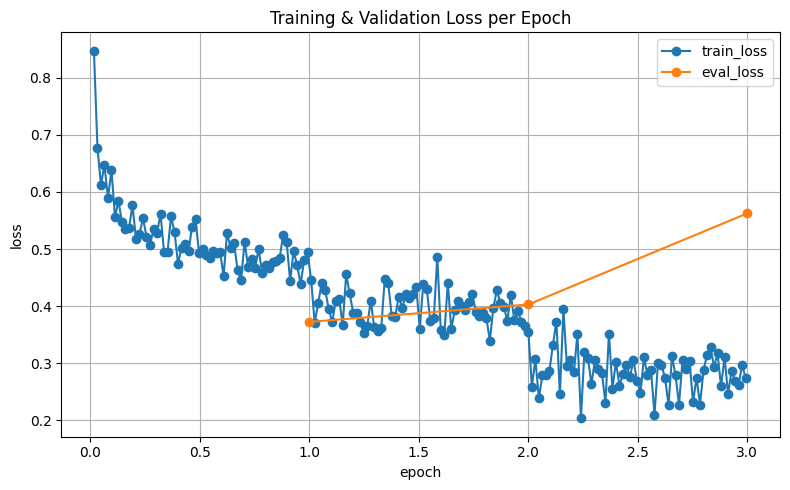

<Figure size 600x600 with 0 Axes>

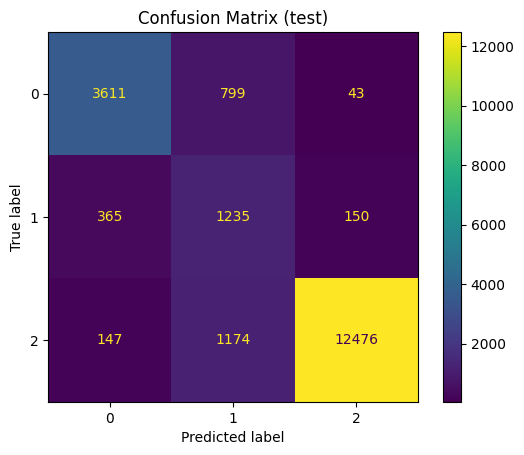

Saved loss plots and classification artifacts into: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug


In [58]:
# COMBINED CELL: plot loss + save loss CSV + classification report + confusion matrix
from src.utils import plot_loss_vs_epochs
import os, json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

run_outdir = res_train["run_outdir"]

# 1) Loss plot
hist_csv = os.path.join(run_outdir, "trainer_history.csv")
df_epochs = plot_loss_vs_epochs(trainer=res_train.get("trainer"), hist_csv=hist_csv, run_outdir=run_outdir)

# 2) Classification report + confusion matrix
trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

report = classification_report(y_true, y_pred, digits=4, output_dict=True)
with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
    json.dump(report, fh, indent=2)
pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(values_format='d')
plt.title("Confusion Matrix (test)")
plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
plt.show()

print("Saved loss plots and classification artifacts into:", run_outdir)


'''
Quick reminders (simple)

To get a proper curve, train for 2 or more epochs (set num_train_epochs >= 2).

The in-session cell saves trainer_state_log_history.json and loss_per_epoch.csv to the run folder. The post-session cell reads those files so you don’t need to retrain.

If auto-find picks the wrong folder, paste run_outdir manually in Cell B or C.


'''

'''
Below is a tiny single-line notebook cell that auto-selects the most recent run folder under outputs/, prints its path, and loads both loss_per_epoch.csv (into df) and a trainer log JSON (trainer_state_log_history.json or trainer_state.json) into log. It prints how many rows/entries were loaded so you know it worked.
'''

In [59]:
run_outdir = max([d for d in __import__('glob').glob('outputs/*') if __import__('os').path.isdir(d)], key=__import__('os').path.getmtime); print("run_outdir:", run_outdir); import json, pandas as pd, os; csv_path=os.path.join(run_outdir,'loss_per_epoch.csv'); df = pd.read_csv(csv_path) if os.path.exists(csv_path) else pd.DataFrame(); log_path=os.path.join(run_outdir,'trainer_state_log_history.json'); log = json.load(open(log_path)) if os.path.exists(log_path) else (json.load(open(os.path.join(run_outdir,'trainer_state.json'))) if os.path.exists(os.path.join(run_outdir,'trainer_state.json')) else None); print("loss_per_epoch rows:", len(df), " | log entries:", (len(log) if log else 0))


run_outdir: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug
loss_per_epoch rows: 189  | log entries: 0


**If neither JSON exists, log will be None.**

####Cell A — run this immediately after training (session active) — uses the trainer in memory and saves useful files into the run folder.

In [60]:
# #Cell 1 — In-session plotting (run right after training)
# # CELL: Plot loss vs epochs now (session active)
# # Requires: res_train from train_and_evaluate(...) containing 'trainer' and 'run_outdir'
# from src.plot_utils import plot_loss_vs_epochs, parse_trainer_log_history
# import json, os

# if "res_train" not in globals():
#     raise ValueError("res_train not found. Run training cell first and keep res_train in session.")

# trainer = res_train["trainer"]
# run_outdir = res_train["run_outdir"]
# print("Using run_outdir:", run_outdir)

# # Save trainer.state.log_history to JSON (safe for post-session)
# try:
#     log_history = getattr(trainer.state, "log_history", None)
#     if log_history:
#         os.makedirs(run_outdir, exist_ok=True)
#         with open(os.path.join(run_outdir, "trainer_state_log_history.json"), "w", encoding="utf-8") as fh:
#             json.dump(log_history, fh, indent=2)
#         print("Saved trainer_state_log_history.json to run folder.")
#     else:
#         print("trainer.state.log_history is empty or not found.")
# except Exception as e:
#     print("Warning: could not save trainer_state.log_history:", e)

# # Prefer trainer_history.csv if trainer saved it; else use trainer.state.log_history
# hist_csv = os.path.join(run_outdir, "trainer_history.csv")
# df_epochs = plot_loss_vs_epochs(trainer=trainer, hist_csv=hist_csv, run_outdir=run_outdir, show_plot=True)

# if df_epochs.empty:
#     print("No epoch-level losses found. If you trained only 1 epoch you'll see a single point. Train >=2 epochs for a curve.")
# else:
#     print("Epoch table (last train loss and eval loss per epoch):")
#     print(df_epochs)
#     # Loss CSV already saved by the function as loss_per_epoch.csv


Using run_outdir: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug
Saved trainer_state_log_history.json to: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug/trainer_state_log_history.json
Saved epoch CSV to: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug/loss_per_epoch.csv
Saved loss plot to: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug/loss_curve.png


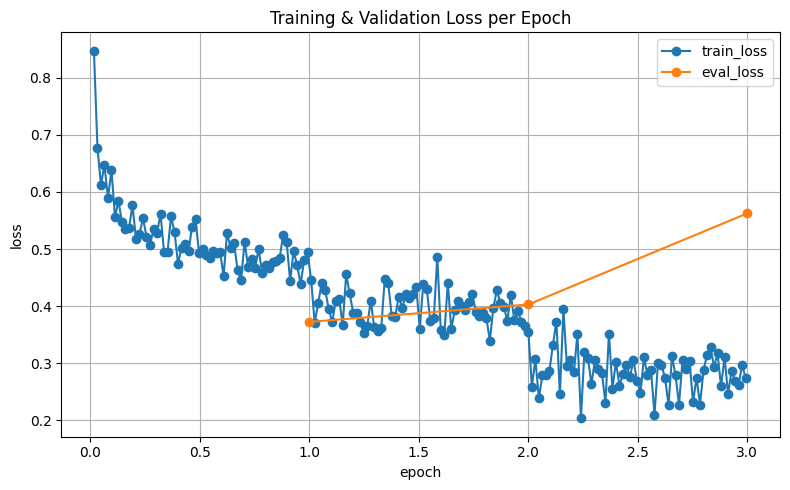

Epoch table (last training loss and eval loss per epoch):
     epoch  train_loss  eval_loss  learning_rate
0    0.016      0.8475        NaN   4.973600e-05
1    0.032      0.6779        NaN   4.946933e-05
2    0.048      0.6124        NaN   4.920267e-05
3    0.064      0.6477        NaN   4.893600e-05
4    0.080      0.5894        NaN   4.866933e-05
..     ...         ...        ...            ...
184  2.944      0.2685        NaN   9.360000e-07
185  2.960      0.2619        NaN   6.693333e-07
186  2.976      0.2975        NaN   4.026667e-07
187  2.992      0.2746        NaN   1.360000e-07
188  3.000         NaN   0.562603            NaN

[189 rows x 4 columns]


<Figure size 600x600 with 0 Axes>

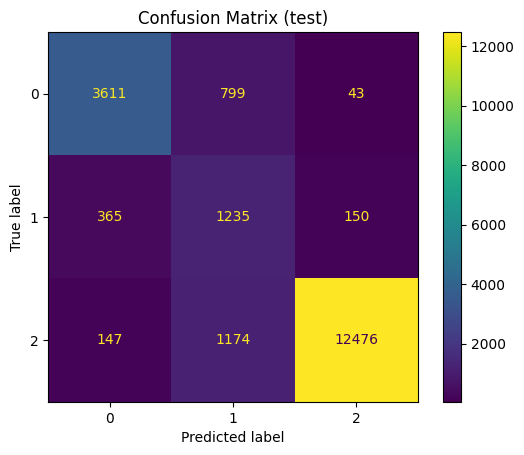

Saved loss plots and classification artifacts into: outputs/bert-base-uncased_lr5e-05_bs8_ep3_20251201_072446_student_debug


In [61]:
# CELL A: In-session plotting (run right after training)
# Paste and run this cell after your training cell that produced `res_train`.
# It reads trainer.state.log_history, saves JSON+CSV for later, and plots loss curves.

import os
import json
from src.utils import plot_loss_vs_epochs, parse_trainer_log_history

# check res_train
if "res_train" not in globals():
    raise ValueError("res_train not found. Run training (train_and_evaluate) first and keep res_train in the session.")

trainer = res_train["trainer"]
run_outdir = res_train["run_outdir"]
print("Using run_outdir:", run_outdir)

# 1) Save trainer.state.log_history to JSON for later use (post-session)
try:
    log_history = getattr(trainer.state, "log_history", None)
    if log_history:
        os.makedirs(run_outdir, exist_ok=True)
        json_path = os.path.join(run_outdir, "trainer_state_log_history.json")
        with open(json_path, "w", encoding="utf-8") as fh:
            json.dump(log_history, fh, indent=2)
        print("Saved trainer_state_log_history.json to:", json_path)
    else:
        print("trainer.state.log_history is empty or missing.")
except Exception as e:
    print("Warning: could not save trainer_state.log_history:", e)

# 2) Prefer trainer_history.csv if present, else parse trainer.state.log_history
hist_csv = os.path.join(run_outdir, "trainer_history.csv")
df_epochs = plot_loss_vs_epochs(trainer=trainer, hist_csv=hist_csv, run_outdir=run_outdir, show_plot=True)

if df_epochs.empty:
    print("No epoch-level losses found. If you trained only 1 epoch you'll see a single point. Train >=2 epochs for a curve.")
else:
    print("Epoch table (last training loss and eval loss per epoch):")
    print(df_epochs)
    # loss_per_epoch.csv saved by function when run_outdir provided


# 2) Classification report + confusion matrix
trainer = res_train["trainer"]
test_tok = res_train["test_tok"]
pred_out = trainer.predict(test_tok)
y_true = pred_out.label_ids
y_pred = pred_out.predictions.argmax(axis=-1)

report = classification_report(y_true, y_pred, digits=4, output_dict=True)
with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
    json.dump(report, fh, indent=2)
pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(6,6))
disp.plot(values_format='d')
plt.title("Confusion Matrix (test)")
plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
plt.show()

print("Saved loss plots and classification artifacts into:", run_outdir)

####Cell B — run later after session restart — finds the run folder (or use the path you saved) and plots from saved CSV / saved trainer_state JSON without retraining.

In [62]:
# #Cell 2 — Post-session plotting (after restart; load from disk)

# # CELL: Plot loss vs epochs after session restart (no trainer in memory)
# # Provide run_outdir or auto-find the latest folder under outputs/
# from src.plot_utils import plot_loss_vs_epochs
# import os, glob

# # Option A: paste your run_outdir path here (preferred)
# # run_outdir = "outputs/your_model_lr..._2025xxxx_xxxxxx"
# run_outdir = None

# # Option B: auto-find the most recent run folder under outputs/
# if run_outdir is None:
#     base = "outputs"
#     candidates = [d for d in glob.glob(os.path.join(base, "*")) if os.path.isdir(d)]
#     if not candidates:
#         raise FileNotFoundError("No run folders found under 'outputs/'. Provide run_outdir manually.")
#     # pick newest by modification time
#     run_outdir = max(candidates, key=os.path.getmtime)
#     print("Auto-selected latest run folder:", run_outdir)

# # Prefer the saved epoch CSV if present
# epoch_csv = os.path.join(run_outdir, "loss_per_epoch.csv")
# if os.path.exists(epoch_csv):
#     print("Found loss_per_epoch.csv — plotting from that.")
#     df = plot_loss_vs_epochs(trainer=None, hist_csv=epoch_csv, run_outdir=run_outdir, show_plot=True)
# else:
#     # Try the previously saved trainer_state_log_history.json or trainer_state.json
#     json_candidates = [
#         os.path.join(run_outdir, "trainer_state_log_history.json"),
#         os.path.join(run_outdir, "trainer_state.json"),
#     ]
#     found = False
#     for jpath in json_candidates:
#         if os.path.exists(jpath):
#             print("Found", jpath, "- parsing and plotting.")
#             df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
#             found = True
#             break
#     if not found:
#         # Try to parse any json under run_outdir
#         parsed = False
#         for root, _, files in os.walk(run_outdir):
#             for f in files:
#                 if f.lower().endswith(".json"):
#                     cand = os.path.join(root, f)
#                     try:
#                         # plot_loss_vs_epochs will scan these files for log_history
#                         df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
#                         parsed = True
#                         break
#                     except:
#                         continue
#             if parsed:
#                 break
#         if not parsed:
#             raise FileNotFoundError("No epoch CSV or trainer_state JSON found in run_outdir. Provide logs or rerun training with logging enabled.")


In [63]:
# CELL B: Post-session plotting (run after kernel restart; no trainer in memory)
# Paste and run this cell. It finds a run folder and plots from saved CSV/JSON.
# If auto-find picks wrong folder, set run_outdir manually.

# import os, glob
# from src.utils import plot_loss_vs_epochs

# # Option 1: paste your run folder path here (recommended)
# run_outdir = None
# # run_outdir = "outputs/distilbert-base-uncased_lr2e-05_bs8_ep2_20251127_123456"  # <- example, paste your actual path

# # Option 2: auto-find newest folder under outputs/
# if run_outdir is None:
#     base = "outputs"
#     candidates = [d for d in glob.glob(os.path.join(base, "*")) if os.path.isdir(d)]
#     if not candidates:
#         raise FileNotFoundError("No run folders found under 'outputs/'. Provide run_outdir manually.")
#     run_outdir = max(candidates, key=os.path.getmtime)
#     print("Auto-selected latest run folder:", run_outdir)

# # Prefer loss_per_epoch.csv if present
# epoch_csv = os.path.join(run_outdir, "loss_per_epoch.csv")
# if os.path.exists(epoch_csv):
#     print("Found loss_per_epoch.csv — plotting from that CSV:", epoch_csv)
#     df = plot_loss_vs_epochs(trainer=None, hist_csv=epoch_csv, run_outdir=run_outdir, show_plot=True)
#     print(df)
# else:
#     # Try trainer_state_log_history.json or trainer_state.json
#     json_candidates = [
#         os.path.join(run_outdir, "trainer_state_log_history.json"),
#         os.path.join(run_outdir, "trainer_state.json")
#     ]
#     found = False
#     for jpath in json_candidates:
#         if os.path.exists(jpath):
#             print("Found", jpath, "- parsing and plotting.")
#             df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
#             found = True
#             break
#     if not found:
#         # fallback: try any JSON under run_outdir
#         parsed = False
#         for root, _, files in os.walk(run_outdir):
#             for f in files:
#                 if f.lower().endswith(".json"):
#                     cand = os.path.join(root, f)
#                     try:
#                         # plot_loss_vs_epochs will scan and parse files under run_outdir
#                         df = plot_loss_vs_epochs(trainer=None, hist_csv=None, run_outdir=run_outdir, show_plot=True)
#                         parsed = True
#                         break
#                     except Exception:
#                         continue
#             if parsed:
#                 break
#         if not parsed:
#             raise FileNotFoundError("No epoch CSV or trainer_state JSON found in run_outdir. Check the folder or re-run the in-session cell after training.")

# # 2) Classification report + confusion matrix
# trainer = res_train["trainer"]
# test_tok = res_train["test_tok"]
# pred_out = trainer.predict(test_tok)
# y_true = pred_out.label_ids
# y_pred = pred_out.predictions.argmax(axis=-1)

# report = classification_report(y_true, y_pred, digits=4, output_dict=True)
# with open(os.path.join(run_outdir, "classification_report_combined.json"), "w", encoding="utf-8") as fh:
#     json.dump(report, fh, indent=2)
# pd.DataFrame(report).transpose().to_csv(os.path.join(run_outdir, "classification_report_combined.csv"))

# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# plt.figure(figsize=(6,6))
# disp.plot(values_format='d')
# plt.title("Confusion Matrix (test)")
# plt.savefig(os.path.join(run_outdir, "confusion_matrix_combined.png"), bbox_inches='tight')
# plt.show()

# print("Saved loss plots and classification artifacts into:", run_outdir)

####Cell C — Quick CSV viewer (inspect numbers)

In [64]:
# CELL C: Quick view of saved loss_per_epoch.csv (optional)
import os, pandas as pd

# set run_outdir manually or reuse last used
try:
    run_outdir  # may be set by Cell B
except NameError:
    run_outdir = None

if run_outdir is None:
    run_outdir = input("Paste run_outdir path (or press Enter to auto-find latest under 'outputs/'): ").strip() or None

if run_outdir is None:
    import glob
    cand = glob.glob("outputs/*")
    cand = [c for c in cand if os.path.isdir(c)]
    if not cand:
        raise FileNotFoundError("No outputs folder found.")
    run_outdir = max(cand, key=os.path.getmtime)
    print("Auto-selected run_outdir:", run_outdir)

csv_path = os.path.join(run_outdir, "loss_per_epoch.csv")
if not os.path.exists(csv_path):
    print("loss_per_epoch.csv not found in", run_outdir)
else:
    df = pd.read_csv(csv_path)
    print("Loaded loss_per_epoch.csv:")
    display(df)


Loaded loss_per_epoch.csv:


,epoch,train_loss,eval_loss,learning_rate
0,0.016,0.8475,NaN,4.973600e-05
1,0.032,0.6779,NaN,4.946933e-05
2,0.048,0.6124,NaN,4.920267e-05
3,0.064,0.6477,NaN,4.893600e-05
4,0.080,0.5894,NaN,4.866933e-05
...,...,...,...,...
184,2.944,0.2685,NaN,9.360000e-07
185,2.960,0.2619,NaN,6.693333e-07
186,2.976,0.2975,NaN,4.026667e-07
187,2.992,0.2746,NaN,1.360000e-07


##Grid Search Tuning